#IEOR 142
##HW2 Problem 3

In [40]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [41]:
train_data = pd.read_csv('framingham_train.csv')
test_data = pd.read_csv('framingham_test.csv')
display(train_data.head(), test_data.head())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,59,Some college/vocational school,0,0,0,0,1,0,285,128.0,91.0,28.23,70,80,0
1,0,43,High school/GED,1,15,1,0,1,0,172,149.0,82.0,22.35,60,64,0
2,0,48,Some high school,0,0,0,0,1,0,275,177.0,101.0,25.22,75,82,1
3,0,52,Some college/vocational school,0,0,0,0,0,0,272,112.5,75.5,22.69,90,83,0
4,0,38,High school/GED,1,5,0,0,0,0,179,116.5,72.5,21.49,70,76,0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,48,High school/GED,1,25,0,0,0,0,250,103.0,76.5,23.25,72,66,0
1,0,58,High school/GED,1,20,0,0,1,0,231,165.0,94.5,27.02,100,80,0
2,0,37,High school/GED,1,20,0,0,0,0,164,96.5,67.0,24.99,68,67,0
3,1,36,Some high school,0,0,0,0,1,0,167,155.0,74.0,19.42,125,81,0
4,0,37,Some college/vocational school,1,15,0,0,0,0,222,110.0,71.0,18.30,80,67,0


##Q3 a.i

In [42]:
logreg1 = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol +sysBP + diaBP + BMI + heartRate + glucose', data = train_data).fit()
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.371879
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                  0.1102
Time:                        11:35:41   Log-Likelihood:                -952.01
converged:                       True   LL-Null:                       -1069.9
Covariance Type:            nonrobust   LLR p-value:                 1.627e-40
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

##Q3 a.ii

Based on the p-values, we can identify that these are the most important risk factors: male, age, cigsPerDay, prevalentHyp, totChol, sysBP, and glucose. They are the most important risk factors because they have the lowest p-values. The prevalentHYP variable is an important factor that determines if a patient is currently hypertensive. The coefficent for this variable is 0.2797. Since the coefficient is positive, it is currently making the variable in the denominator larger. However, there is a negative sign before all the coefficients, so it is contributing to a more negative subscript in the denominator. Therefore, it is making the overal result to be a larger value, making the prediction of a patient’s odds of developing CHD higher. This makes a lot of sense, as hypertension often leads to heart disease.

##Q3 a.iii

In [43]:
p = 95000 / 859500
p

0.11052937754508435

##Q3 a.iv

In [44]:
y_prob = logreg1.predict(test_data)

In [45]:
 y_pred = pd.Series([1 if x > p else 0 for x in y_prob], index=y_prob.index)
 y_test = test_data['TenYearCHD']

In [46]:
 cm1 = confusion_matrix(y_test, y_pred)
 print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[495 423]
 [ 31 149]]


In [47]:
TN = cm1.ravel()[0]
FP = cm1.ravel()[1]
FN = cm1.ravel()[2]
TP = cm1.ravel()[3]
FP

423

In [48]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.5865209471766849

In [49]:
tpr = TP / (TP + FN)
tpr

0.8277777777777777

In [50]:
fpr = FP / (TN + FP)
fpr

0.46078431372549017

##Q3 a.v

In [51]:
estimate_economic_cost = (TP * 1050000) + (FP * 95000) + (FN * 955000) + (TN * 0)
total_patients = TP + TN + FP + FN
estimate_economic_cost_per_patient = estimate_economic_cost / total_patients
estimate_economic_cost_per_patient

206047.35883424408

In [52]:
updatedTP = TP * .1
updatedFP = FP + TP*(1 - .1)
updatedTP, updatedFP

(14.9, 557.1)

In [53]:
updated_estimate_economic_cost = (updatedTP * 1050000) + (updatedFP * 95000) + (FN * 955000) + (TN * 0)
updated_estimate_economic_cost_per_patient = updated_estimate_economic_cost / total_patients
updated_estimate_economic_cost_per_patient

89412.11293260474

##Q3 a.vi

In [54]:
baseline = np.repeat(0, total_patients)
y_test = test_data['TenYearCHD']
cm2 = confusion_matrix(y_test, baseline)
print ("Confusion Matrix : \n", cm2)

Confusion Matrix : 
 [[918   0]
 [180   0]]


In [55]:
TN2 = cm2.ravel()[0]
FP2 = cm2.ravel()[1]
FN2 = cm2.ravel()[2]
TP2 = cm2.ravel()[3]

In [56]:
accuracy2 = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
accuracy2

0.8360655737704918

In [57]:
tpr2 = TP2 / (TP2 + FN2)
tpr2

0.0

In [58]:
fpr2 = FP2 / (TN2 + FP2)
fpr2

0.0

In [59]:
baseline_expected_cost = (TP2 * 1050000) + (955000 * FN2)
average_baseline_expected_cost = baseline_expected_cost / (TP2 + FP2 + FN2 + TN2)
average_baseline_expected_cost

156557.37704918033

##Q3 a.vii

In [60]:
train_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,59,Some college/vocational school,0,0,0,0,1,0,285,128.0,91.0,28.23,70,80,0
1,0,43,High school/GED,1,15,1,0,1,0,172,149.0,82.0,22.35,60,64,0
2,0,48,Some high school,0,0,0,0,1,0,275,177.0,101.0,25.22,75,82,1
3,0,52,Some college/vocational school,0,0,0,0,0,0,272,112.5,75.5,22.69,90,83,0
4,0,38,High school/GED,1,5,0,0,0,0,179,116.5,72.5,21.49,70,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,1,61,Some high school,1,20,0,0,0,0,260,115.0,79.0,23.65,56,78,0
2556,0,41,Some high school,1,20,0,0,1,0,189,150.0,106.0,33.80,85,75,0
2557,0,63,High school/GED,1,40,0,0,0,0,179,116.0,69.0,22.15,95,75,1
2558,0,42,Some college/vocational school,1,20,0,0,0,0,304,119.0,76.0,32.52,64,80,0


In [61]:
data = [[1, 48, 'College', 1, 18, 1, 0 , 1, 1, 240, 140, 90, 36, 72, 105]]
patient7 = pd.DataFrame(data = data, columns = ['male', 'age', 'education', 'currentSmoker',
                        'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
                                'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
y_prob3 = logreg1.predict(patient7)
y_prob3

0    0.262002
dtype: float64

##Q3b: ROC Curve

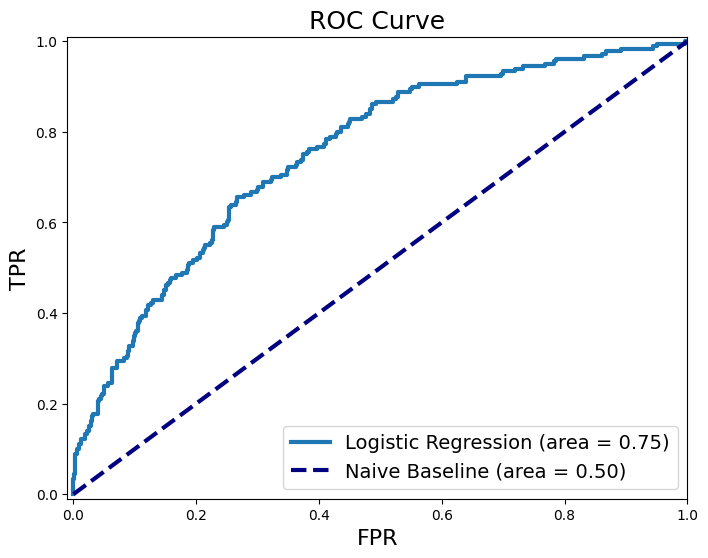

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'. format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()